<a href="https://colab.research.google.com/github/Harshksaw/Machine-Learning/blob/master/stock_market_predML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Live Stock Price Data using Yahoo finance Api

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import math
import matplotlib.pyplot as plt
import tensorflow


In [ ]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 2000)
d2.strftime("%Y-%m-%d")
start_date = d2


In [ ]:
data = yf.download('MSFT' ,start = start_date ,end = end_date, progress = False)

#Importing Data and Ploting 

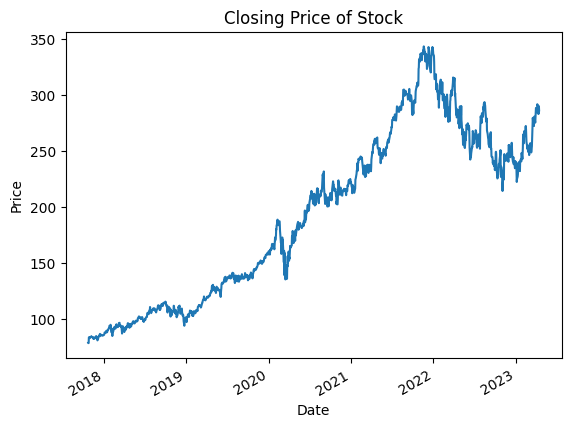

In [ ]:
# Set the 'Date' column as the index
# data.set_index('Date', inplace=True)
data['Close'].plot(title='Closing Price of Stock', xlabel='Date', ylabel='Price')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

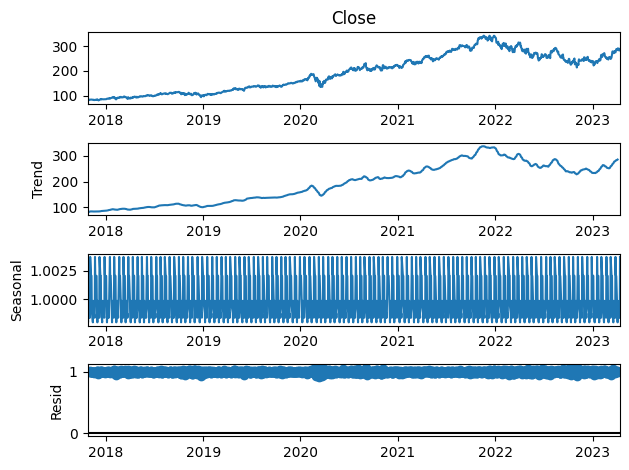

In [ ]:
# data.index = data['Date']
results = seasonal_decompose(data['Close'],model = 'multiplicative' , period = 12)
results.plot();

In [ ]:
data["Date"] = data.index
data = data[["Date" , "Open" ,"High", "Low","Close","Volume"]]
data.reset_index(drop = True,inplace = True)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-10-24,78.900002,79.199997,78.459999,78.860001,17517200
1,2017-10-25,78.580002,79.099998,78.010002,78.629997,20410800
2,2017-10-26,79.199997,79.419998,78.750000,78.760002,32120700
3,2017-10-27,84.370003,86.199997,83.610001,83.809998,71066700
4,2017-10-30,83.699997,84.330002,83.110001,83.889999,31756700


Seasonal decomposition is a technique used to break down a time series into its trend, seasonal, and residual
-> If the magnitude of the seasonal component changes with time, then the series is multiplicative. so we have taken multiplicative here -> Multiplicative: x t = Trend * Seasonal * Random

In [ ]:
data.shape

(1377, 6)

In [ ]:
data['Close']

0        78.860001
1        78.629997
2        78.760002
3        83.809998
4        83.889999
           ...    
1372    289.390015
1373    282.829987
1374    283.489990
1375    289.839996
1376    286.140015
Name: Close, Length: 1377, dtype: float64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Making moving average ma100 -> moving average 100 ma50 -> moving average 50


In [ ]:
ma100 = data.Close.rolling(100).mean()
ma50 = data.Close.rolling(50).mean()
ma200 = data.Close.rolling(200).mean()

Observation -> When the moving average of 50 periods crosses above the moving average of 100 periods, it is often seen as a bullish signal in technical analysis. Conversely, when the 50-period moving average crosses below the 100-period moving average, it is often seen as a bearish signal.
-> Looking at bigger picture When a long-term moving average, such as the 200-day moving average, crosses above or below a short-term moving average, such as the 100-day moving average, it is known as a "moving average crossover." This is a common technical analysis signal used by traders and investors to identify potential changes in trend

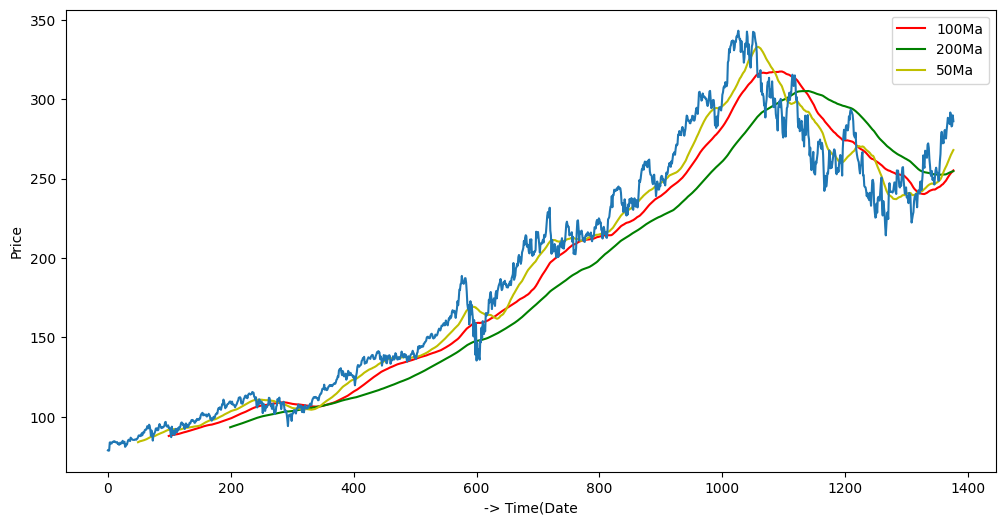

In [ ]:
plt.figure(figsize = (12,6)) 
plt.plot(ma100,color ='r', label ="100Ma")
plt.plot(ma200,color ='g', label ="200Ma")
plt.plot(ma50,color ='y' ,label ="50Ma")
plt.xlabel("-> Time(Date")
plt.ylabel("Price")
plt.legend()
plt.plot(data.Close)

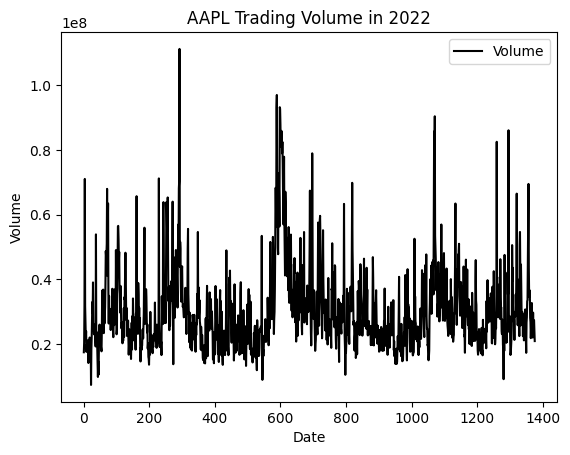

In [ ]:
data['Volume'].plot(style='k-', title='AAPL Trading Volume in 2022', xlabel='Date', ylabel='Volume') 
plt.legend()

In [ ]:
df =data
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-10-24,78.900002,79.199997,78.459999,78.860001,17517200
1,2017-10-25,78.580002,79.099998,78.010002,78.629997,20410800
2,2017-10-26,79.199997,79.419998,78.750000,78.760002,32120700
3,2017-10-27,84.370003,86.199997,83.610001,83.809998,71066700
4,2017-10-30,83.699997,84.330002,83.110001,83.889999,31756700


In [ ]:
df = df.reset_index()['Close']
df.shape

(1377,)

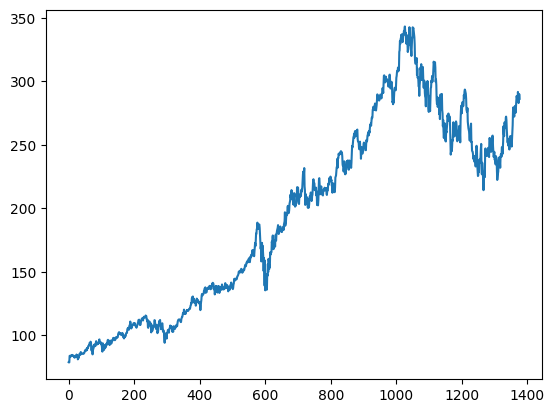

In [ ]:
plt.plot(df) #data set we will work with for training 

LSTM model are sensitive to scale of the data. so we apply MinMaxScaler


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df


array([[8.69643706e-04],
       [0.00000000e+00],
       [4.91549035e-04],
       ...,
       [7.74576536e-01],
       [7.98585937e-01],
       [7.84596290e-01]])

Splitting the data into train and test split

In [ ]:
training_size = int(len(df)* 0.75)
test_size = len(df) - training_size

train_data , test_data = df[0: training_size], df[training_size : len(df),  :1]

In [ ]:
len(train_data), len(test_data)

(1032, 345)

In [ ]:
#create an array of values into a dataset matrix
# function ->

def dataset_reshape(dataset , time_steps = 1):
  dataX , dataY = [],[]
  for i in range(len(dataset)-time_steps -1):
    a = dataset[i : (i + time_steps) , 0]  # 1 ,2 ,3 -- 100  , append(101)
    dataX.append(a)
    dataY.append(dataset[i + time_steps, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_steps = 100
X_train , y_train = dataset_reshape(train_data , time_steps )
X_test , y_test = dataset_reshape(test_data , time_steps)

In [ ]:
print(X_train.shape)

(931, 100)


In [ ]:
#convert in into 3D dimensional 
# [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [ ]:
# X_train[2]

MODEL ->

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50 , return_sequences = True, input_shape = (100, 1)))
# model.add(Dropout=(0.2))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


MODEL TRAINING ->

In [ ]:
model.fit(X_train,y_train,batch_size =1,epochs = 1)

931/931 [==============================] - 59s 59ms/step - loss: 0.0025


In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 1s 59ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


182.19144736392988

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))


250.77689944755625

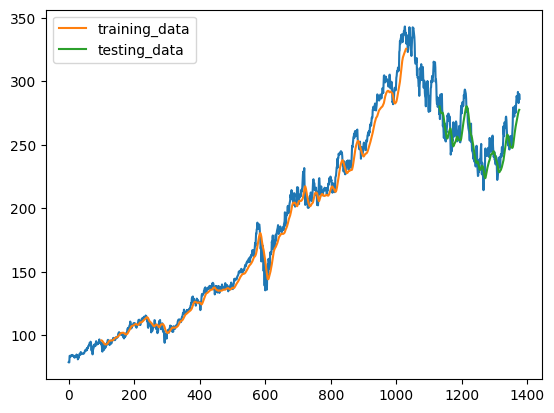

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot , label = 'training_data' ,)
plt.plot(testPredictPlot, label = 'testing_data')
plt.legend()
plt.show()